In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/yash91sharma/IMDB-Movie-Dataset-Analysis/master/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

In [6]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [7]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [105]:
df.drop('movie_imdb_link', axis = 1, inplace = True) # Retirando a coluna com os links;

In [10]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [106]:
df.drop('color', axis = 1, inplace = True) # Dada a pouca proporção de filmes preto e branco, a variável também será retirada;

In [19]:
df.isna().sum() # Verificando quantidade de valores faltantes;

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [25]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [107]:
df['content_rating'].fillna('R', inplace = True) # Imputando os valores faltantes pela categoria mais comum;

In [27]:
df['aspect_ratio'].value_counts()

2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.39       15
2.20       15
4.00        7
2.00        5
2.40        3
2.76        3
1.75        3
1.50        2
2.55        2
2.24        1
1.77        1
1.18        1
1.44        1
1.20        1
1.89        1
Name: aspect_ratio, dtype: int64

In [108]:
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace = True) # Imputando os valores faltantes pela madiana;

In [109]:
df['budget'].fillna(df['budget'].median(), inplace = True)
df['gross'].fillna(df['gross'].median(), inplace = True)

In [110]:
df.dropna(axis = 0, inplace = True) # Excluindo as demais observações que receberam algum valor faltante

In [67]:
df.shape

(4737, 26)

In [111]:
df.duplicated().sum() # Verificando a existência de observações duplicadas;

42

In [112]:
df.drop_duplicates(inplace = True)

In [69]:
df.shape

(4695, 26)

In [39]:
df['language'].value_counts(normalize = True) # Mais de 90% dos filmes possui língua inglesa; 

English       0.938232
French        0.014696
Spanish       0.007455
Hindi         0.005325
Mandarin      0.005112
German        0.003834
Japanese      0.003408
Russian       0.002343
Cantonese     0.002130
Italian       0.002130
Portuguese    0.001704
Korean        0.001704
Danish        0.001065
Hebrew        0.000852
Persian       0.000852
Norwegian     0.000852
Swedish       0.000852
Dutch         0.000852
Thai          0.000639
Arabic        0.000639
Dari          0.000426
Aboriginal    0.000426
Indonesian    0.000426
None          0.000426
Zulu          0.000426
Czech         0.000213
Romanian      0.000213
Vietnamese    0.000213
Dzongkha      0.000213
Polish        0.000213
Maya          0.000213
Filipino      0.000213
Icelandic     0.000213
Kazakh        0.000213
Hungarian     0.000213
Bosnian       0.000213
Telugu        0.000213
Aramaic       0.000213
Mongolian     0.000213
Greek         0.000213
Name: language, dtype: float64

In [113]:
df.drop('language', axis = 1, inplace = True)

In [41]:
df['country'].value_counts(normalize = True)

USA               0.759957
UK                0.089457
France            0.031736
Canada            0.022790
Germany           0.020447
Australia         0.011289
Spain             0.006816
India             0.005751
China             0.005112
Japan             0.004473
Italy             0.004260
Hong Kong         0.003408
New Zealand       0.002982
South Korea       0.002556
Russia            0.002343
Ireland           0.002343
Mexico            0.002343
Denmark           0.002343
South Africa      0.001704
Brazil            0.001704
Norway            0.001491
Sweden            0.001065
Netherlands       0.001065
Thailand          0.000852
Iran              0.000852
Argentina         0.000852
Israel            0.000639
West Germany      0.000639
Switzerland       0.000639
Belgium           0.000639
Czech Republic    0.000639
Romania           0.000426
Taiwan            0.000426
Poland            0.000426
Iceland           0.000426
Hungary           0.000426
Greece            0.000426
O

In [114]:
# Retirando country e outras varriáveis com muitas categorias;
df.drop(['country', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'movie_title'], axis = 1, inplace = True)

In [76]:
df['genres'].value_counts()

Drama                                                           209
Comedy                                                          186
Comedy|Drama|Romance                                            182
Comedy|Drama                                                    180
Comedy|Romance                                                  149
                                                               ... 
Adventure|Comedy|Family|Sci-Fi                                    1
Action|Adventure|Crime|Drama|Family|Fantasy|Romance|Thriller      1
Adventure|Comedy|History|Romance                                  1
Adventure|Family|Fantasy|Sci-Fi                                   1
Comedy|Crime|Horror                                               1
Name: genres, Length: 875, dtype: int64

In [115]:
df.drop('genres', axis = 1, inplace = True)

In [73]:
df['Profit'] = df['budget'].sub(df['gross'], axis = 0)  # Variável com o lucro dos filmes;
df['Profit_Percentage'] = (df['Profit']/df['gross'])*100 # Variável com porcentagem do lucro;

df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


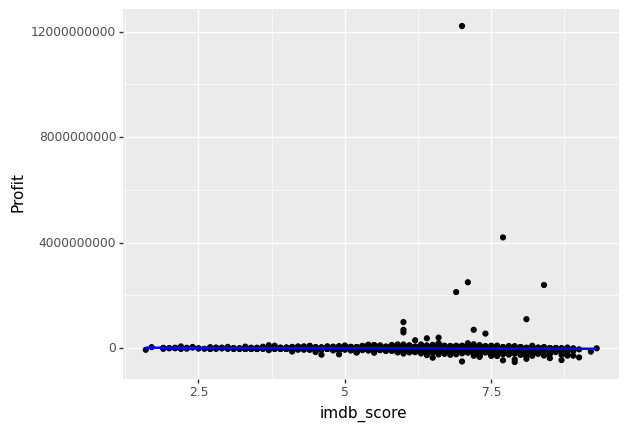

<ggplot: (8769254771993)>

In [74]:
# Verificando a correlação entre a nota e o lucro do filme
ggplot(aes(x = 'imdb_score', y = 'Profit'), data = df) +\
    geom_point() +\
    stat_smooth(colour = 'blue', span = 1)

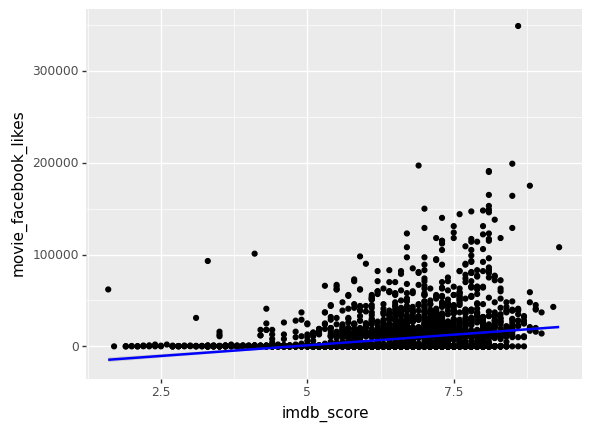

<ggplot: (8769255070493)>

In [75]:
# Verificando a correlação entre a nota e os likes no facebook
ggplot(aes(x = 'imdb_score', y = 'movie_facebook_likes'), data = df) +\
    geom_point() +\
    stat_smooth(colour = 'blue', span = 1)

In [78]:
# As variáveis criadas foram interessantes para analisar, mas estão correlacionadas com outros atributos, por isso serão retiradas para o modelo;
df.drop(['Profit', 'Profit_Percentage'], axis = 1, inplace = True)

In [88]:
corr = df.corr
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth": 2.5})
plt.figure(figsize = (13, 7))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
# a = sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
# rotx = a.set_xtickslabels(a.get_xtickslabels(), rotation = 90)
# roty = a.set_ytickslabels(a.get_ytickslabels(), rotation = 30)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.242527,0.180436,0.261663,0.188179,0.477079,0.617697,0.257830,-0.031141,0.597524,0.117021,0.311280,0.273593,0.333878,0.044958,0.688577
duration,0.242527,1.000000,0.174058,0.125187,0.082103,0.241117,0.335915,0.117458,0.028820,0.349187,0.071234,-0.126196,0.130991,0.353336,0.065745,0.209168
director_facebook_likes,0.180436,0.174058,1.000000,0.121849,0.092795,0.144562,0.299873,0.121371,-0.041351,0.222415,0.021355,-0.063204,0.119481,0.178693,0.002910,0.162974
actor_3_facebook_likes,0.261663,0.125187,0.121849,1.000000,0.254428,0.295382,0.273606,0.477359,0.102574,0.220426,0.045600,0.104569,0.554330,0.054634,0.018577,0.267619
actor_1_facebook_likes,0.188179,0.082103,0.092795,0.254428,1.000000,0.152973,0.190891,0.950997,0.071068,0.141975,0.022749,0.096330,0.398525,0.075970,0.019773,0.135656
gross,0.477079,0.241117,0.144562,0.295382,0.152973,1.000000,0.633501,0.238679,-0.026740,0.561510,0.108534,0.051458,0.260517,0.186329,0.022474,0.370566
num_voted_users,0.617697,0.335915,0.299873,0.273606,0.190891,0.633501,1.000000,0.258928,-0.029007,0.794837,0.078567,0.022530,0.258965,0.436401,0.020610,0.529759
cast_total_facebook_likes,0.257830,0.117458,0.121371,0.477359,0.950997,0.238679,0.258928,1.000000,0.090835,0.199979,0.035882,0.122300,0.636930,0.086906,0.025072,0.206085
facenumber_in_poster,-0.031141,0.028820,-0.041351,0.102574,0.071068,-0.026740,-0.029007,0.090835,1.000000,-0.070491,-0.019360,0.059499,0.073243,-0.065704,0.014971,0.008506
num_user_for_reviews,0.597524,0.349187,0.222415,0.220426,0.141975,0.561510,0.794837,0.199979,-0.070491,1.000000,0.083761,0.013394,0.209424,0.309540,0.019387,0.392440


In [116]:
df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']   # Tirando variáveis correlacionadas
df.drop(['actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes'], axis = 1, inplace = True)

In [117]:
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']  # Tirando variáveis correlacionadas
df.drop(['num_critic_for_reviews', 'num_user_for_reviews'], axis = 1, inplace = True)

In [ ]:
# Repetir a matriz

In [118]:
# Preferível categorizar a resposta, a fim de facilitar a previsão
df['imdb_binned_score'] = pd.cut(df['imdb_score'], bins = [0, 2, 4, 8, 10], right = True, labels = False) + 1
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
0,178.0,0.0,1000.0,760505847.0,886204,0.0,PG-13,237000000.0,2009.0,7.9,1.78,33000,1791.0,0.236739,3
1,169.0,563.0,40000.0,309404152.0,471220,0.0,PG-13,300000000.0,2007.0,7.1,2.35,0,6000.0,0.243942,3
2,148.0,0.0,11000.0,200074175.0,275868,1.0,PG-13,245000000.0,2015.0,6.8,2.35,85000,554.0,0.605634,3
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,PG-13,250000000.0,2012.0,8.5,2.35,164000,46000.0,0.301000,4
5,132.0,475.0,640.0,73058679.0,212204,1.0,PG-13,263700000.0,2012.0,6.6,2.35,24000,1162.0,0.626016,3


In [119]:
df = pd.get_dummies(data = df, columns = ['content_rating'], prefix = ['content_rating'], drop_first = True) # Transformando variável categórica em dummy;

In [96]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
0,178.0,0.0,1000.0,760505847.0,886204,0.0,237000000.0,2009.0,7.9,1.78,...,0,0,1,0,0,0,0,0,0,0
1,169.0,563.0,40000.0,309404152.0,471220,0.0,300000000.0,2007.0,7.1,2.35,...,0,0,1,0,0,0,0,0,0,0
2,148.0,0.0,11000.0,200074175.0,275868,1.0,245000000.0,2015.0,6.8,2.35,...,0,0,1,0,0,0,0,0,0,0
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,250000000.0,2012.0,8.5,2.35,...,0,0,1,0,0,0,0,0,0,0
5,132.0,475.0,640.0,73058679.0,212204,1.0,263700000.0,2012.0,6.6,2.35,...,0,0,1,0,0,0,0,0,0,0


In [140]:
Y = df['imdb_binned_score']
X = df[df.columns.difference(['imdb_score', 'imdb_binned_score'])]

Y.head()

0    3
1    3
2    3
3    4
5    3
Name: imdb_binned_score, dtype: int64

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [142]:
sc_X = StandardScaler() # Iniciando o construtor para normalizar as variáveis;
X_train = sc_X.fit_transform(X_train) # Vai normalizar as variáveis dummy??
X_test = sc_X.fit_transform(X_test)

In [143]:
logit = LogisticRegression(verbose = 1, max_iter = 1000) # Define o modelo;
logit.fit(X_train, np.ravel(Y_train, order = 'C'))  # Ajusta o modelo;
Y_pred = logit.predict(X_test) # Faz as predições para os dados de teste

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [147]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[   0,    0,    3,    0],
       [   0,    0,   51,    0],
       [   0,    1, 1284,    5],
       [   0,    0,   28,   37]])

In [148]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        51
           3       0.94      1.00      0.97      1290
           4       0.88      0.57      0.69        65

    accuracy                           0.94      1409
   macro avg       0.46      0.39      0.41      1409
weighted avg       0.90      0.94      0.92      1409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
